In [3]:
library(tidyverse)
library(pheatmap)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
sensitivity_genes = list(
    'BRCA1',
    'DDX11',
    'EME1',
    'H2AFX',
    'LIG1',
    'MND1',
    'PRDX1',
    'PSMC3IP',
    'RAD51B',
    'RAD51D',
    'RAD54L',
    'RNASEH2A',
    'RNASEH2B',
    'RNASEH2C',
    'RNF8',
    'SWI5',
    'TRAIP',
    'XRCC1',
    'XRCC2'
)

In [5]:
geneset_identifiers = list(
         'DDIT4', 'PRDX1', 'PTEN', 'TSC1', 'TXN', 'YWHAE', 'YWHAZ',
         'AGO3', 'LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'MLST8', 'MTOR', 'PRDX1', 'RHEB', 'RPTOR', 'SLC38A9', 'TXN', 'YWHAB',
         'DDIT4', 'G6PD', 'PRDX1', 'PRKAA1', 'PTEN', 'TSC1', 'YWHAB', 'YWHAE', 'YWHAZ',
         'LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'MLST8', 'MTOR', 'PRDX1', 'RHEB', 'RPTOR', 'TXN',
         'COX6B1', 'DDIT4', 'G6PD', 'GPX2', 'PRDX1', 'PRKAB2', 'PRKAG1', 'PTEN', 'SESN2', 'TSC1', 'TXN', 'YWHAB', 'YWHAE', 'YWHAZ'
) %>% unique

Clustering

In [6]:
Ci_df_rho = read.table('Ci_df_rho.txt',sep='\t',header=TRUE) %>% data.frame %>% column_to_rownames('gene')

colnames(Ci_df_rho) = Ci_df_rho %>% colnames %>% str_replace('Ci.','') %>% str_replace('.rho','')

In [7]:
Ci_df_rho %>% dim

[1] 18905     9

In [8]:
ann = data.frame(
    drug=Ci_df_rho %>% colnames %>% sort,
    PARPi=factor(c(rep('n',2),rep('y',5),rep('n',2)))
) %>% column_to_rownames('drug')

ann

,PARPi
,<fct>
Ki,n
Mi,n
Pi,y
PiKi,y
PiMi,y
PiRi,y
PiWi,y
Ri,n
Wi,n


### sensitivity_genes

In [9]:
my.breaks <- c(seq(-2, 2, by=.5)) 

heat_colors <- brewer.pal(n = length(my.breaks), name = "RdYlBu") %>% rev
greens <- brewer.pal(n = 9, name = "Greens")
ann_colors = list(
    PARPi = c('n'="grey90", 'y'="darkorchid")
)

png 
  2

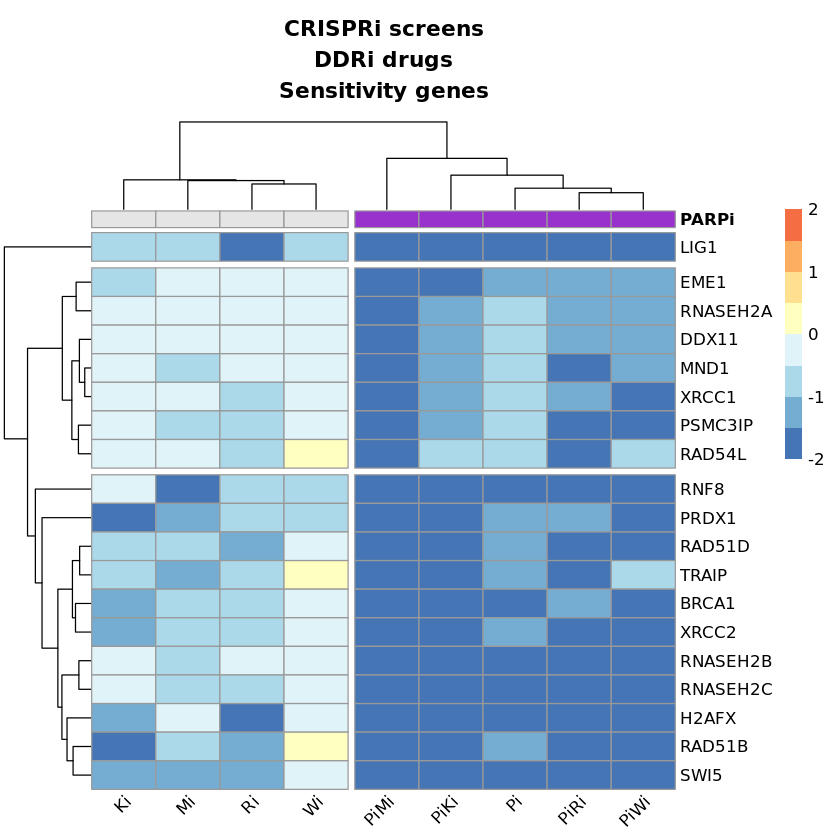

In [10]:
Ci_df_rho[sensitivity_genes %>% unlist,] %>% 
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = T,
        show_rownames = T,
        cutree_col = 2,
        cutree_rows = 3,
        main = 'CRISPRi screens\nDDRi drugs\nSensitivity genes',
        breaks = my.breaks,
        annotation = ann,
        cluster_cols = T, 
        # scale = 'row',
        angle_col= 45,
        annotation_colors = ann_colors,
        annotation_legend=FALSE
) -> hm1

# https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
pdf('figures/rho_hm_Ci_sensitivity_genes.pdf', width=6, height=6)
grid::grid.newpage()
grid::grid.draw(hm1$gtable)
dev.off()

### geneset_identifiers

In [11]:
my.breaks <- c(seq(-2, 2, by=.5)) 

heat_colors <- brewer.pal(n = length(my.breaks), name = "RdYlBu") %>% rev
greens <- brewer.pal(n = 9, name = "Greens")
ann_colors = list(
    PARPi = c('n'="grey90", 'y'="darkorchid")
)

png 
  2

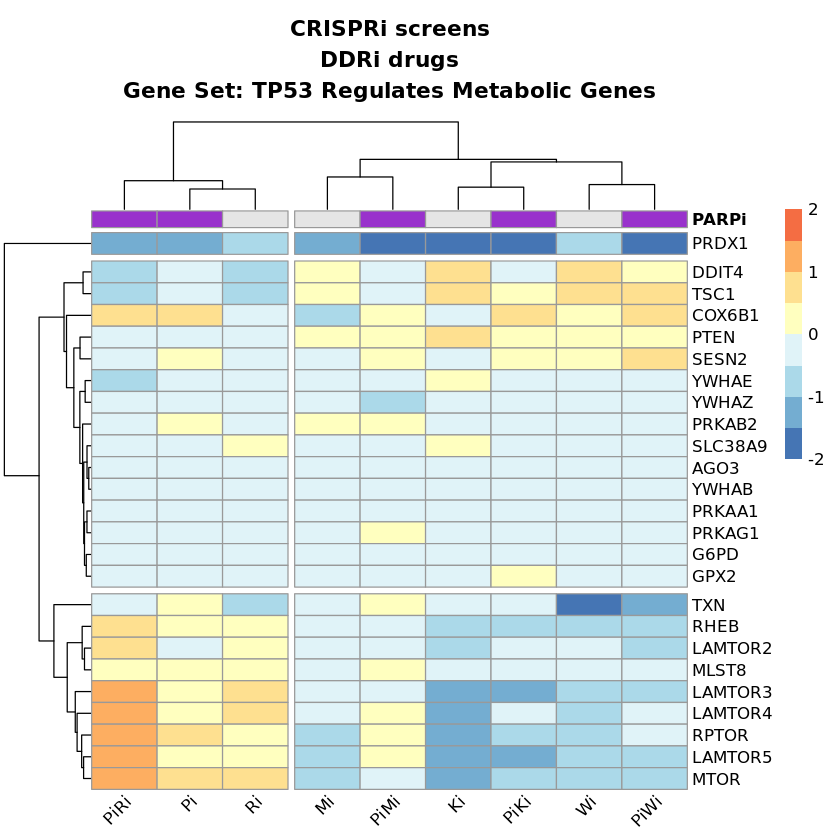

In [12]:
Ci_df_rho[geneset_identifiers %>% unlist,] %>% 
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = T,
        show_rownames = T,
        cutree_col = 2,
        cutree_rows = 3,
        main = 'CRISPRi screens\nDDRi drugs\nGene Set: TP53 Regulates Metabolic Genes',
        breaks = my.breaks,
        annotation = ann,
        cluster_cols = T, 
        # scale = 'row',
        angle_col= 45,
        annotation_colors = ann_colors,
        annotation_legend=FALSE
) -> hm2

# https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
pdf('figures/rho_hm_Ci_TP53_Regulates_Metabolic_Genes.pdf', width=6, height=7)
grid::grid.newpage()
grid::grid.draw(hm2$gtable)
dev.off()

png 
  2

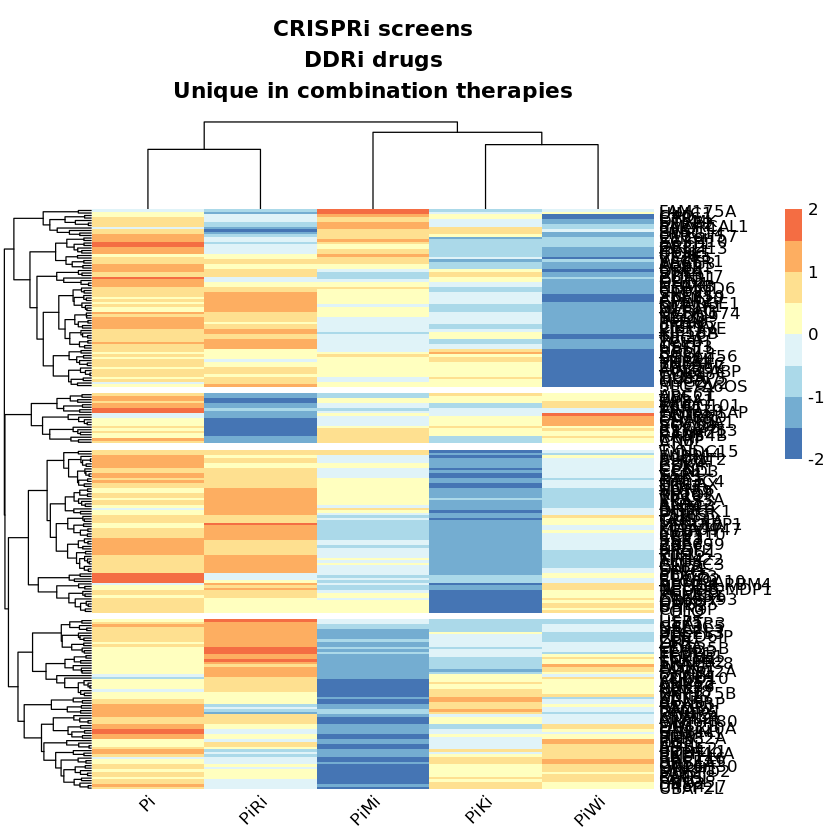

In [39]:
Ci_df_rho[read.table('unique_combo.txt')$V1,] %>% select(contains("Pi")) %>% 
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = T,
        show_rownames = T,
        # cutree_col = 4,
        cutree_rows = 4,
        main = 'CRISPRi screens\nDDRi drugs\nUnique in combination therapies',
        breaks = my.breaks,
        # annotation = ann,
        cluster_cols = T, 
        scale = 'row',
        angle_col= 45,
        # annotation_colors = ann_colors,
        annotation_legend=FALSE
) -> hm3

# https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
pdf('figures/rho_hm_Ci_Unique_in_combination_therapies.pdf', width=6, height=30)
grid::grid.newpage()
grid::grid.draw(hm3$gtable)
dev.off()

[1] "ALG12"      "ALG8"       "B3GNT2"     "C16orf93"   "CCND3"     
  [6] "CCNL1"      "CCP110"     "CDK4"       "CHD2"       "CHTOP"     
 [11] "CNBP"       "CSK"        "CUL2"       "DAD1"       "DDRGK1"    
 [16] "DDX3X"      "EIF1AX"     "EIF3H"      "EMC2"       "FAM122A"   
 [21] "FBXL5"      "FUBP1"      "GLIS3"      "GTF3C5"     "HYOU1"     
 [26] "KCNE1L"     "KIAA0947"   "MIS18BP1"   "MUTYH"      "NAE1"      
 [31] "NEDD8"      "NEDD8-MDP1" "NONO"       "PET117"     "POLQ"      
 [36] "PSME3"      "RBM14-RBM4" "RFWD2"      "RHOA"       "RPE"       
 [41] "RPTOR"      "RRP1"       "SFPQ"       "SSR1"       "SSR2"      
 [46] "SSR3"       "TARS"       "TGFBR2"     "TIAL1"      "TIMM22"    
 [51] "TLN1"       "TXNDC15"    "TXNL4A"     "UBR5"       "USP5"      
 [56] "VPS29"      "WDR44"      "WWTR1"      "ZNF451"     "ZNF699"    
 [61] "ACTG1"      "ADSL"       "ANKS3"      "ANKS6"      "ATXN2L"    
 [66] "AUNIP"      "BLM"        "BRD2"       "C11orf30"   "C16orf80"  
 [71] "C4orf27"    "CCNB1"      "CDC25B"     "CDC73"      "CLASRP"    
 [76] "CLTC"       "CTR9"       "CUL5"       "DCP2"       "DDX6"      
 [81] "DNAJA1"     "DNPH1"      "DOC2B"      "DR1"        "EEF1E1"    
 [86] "EIF4E2"     "FAM120A"    "FAM175B"    "FANCI"      "FANCL"     
 [91] "FOXM1"      "GNB1L"      "HEXIM1"     "IL5"        "KAT7"      
 [96] "KDM5A"      "KRT18"      "LEMD3"      "LRBA"       "LSM12"     
[101] "MNT"        "MOSPD2"     "NEK7"       "NEK8"       "NSA2"      
[106] "PAN3"       "PAXIP1"     "PDCD10"     "PDCD6IP"    "PRPF40A"   
[111] "PRRC2A"     "PTGES3"     "RAD1"       "RAD18"      "RAD52"     
[116] "RNF146"     "SNRPB2"     "SRSF11"     "SRSF2"      "SYVN1"     
[121] "TFDP1"      "TRAPPC8"    "UBAP2L"     "UBE2L3"     "UBE4A"     
[126] "ABCC1"      "ATM"        "BOD1L1"     "C17orf53"   "C4orf21"   
[131] "CCDC101"    "CCNF"       "CDAN1"      "CNOT4"      "DDIT4"     
[136] "FAM175A"    "FAM83D"     "IWS1"       "LRRC14"     "MCM4"      
[141] "PARP2"      "PRPF39"     "RAD54B"     "RFWD3"      "SLC39A1"   
[146] "SOCS3"      "TADA1"      "TRNAU1AP"   "UBE2T"      "UIMC1"     
[151] "WIZ"        "ZAR1L"      "ASCC3"      "ATXN10"     "C12orf57"  
[156] "C18orf56"   "CAD"        "CBLL1"      "CCAR1"      "CCDC174"   
[161] "CCNC"       "CDK8"       "CHD4"       "COMMD6"     "CPSF2"     
[166] "CSTF3"      "CTPS1"      "CTU2"       "DBF4"       "DLGAP5"    
[171] "DTYMK"      "DUT"        "EIF1"       "ESYT1"      "GSG2"      
[176] "GTF2F1"     "GTF3C3"     "GTF3C4"     "HBS1L"      "HEATR3"    
[181] "INTS6"      "IPO9"       "IVNS1ABP"   "KIF18A"     "KIF18B"    
[186] "KIF2C"      "KRAS"       "KTI12"      "MLF1IP"     "MYEOV2"    
[191] "NEDD9"      "NFRKB"      "ORC2"       "PCBP1"      "PFDN5"     
[196] "PIKFYVE"    "POLR3K"     "RBL2"       "RNPC3"      "SERF2"     
[201] "SGOL1"      "SGOL2"      "SLC39A10"   "SLC7A6OS"   "SMARCAL1"  
[206] "SMARCE1"    "SREK1"      "SRPR"       "STIP1"      "TBCA"      
[211] "TBCD"       "TCEB1"      "TUBA1C"     "TYMS"       "UVRAG"     
[216] "VEZF1"      "VPS33A"     "YY1"        "ZBTB17"     "ZC3H10"    
[221] "ZC3H13"     "ZFR"        "ZNF259"     "ZNF367"